В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [168]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score


medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


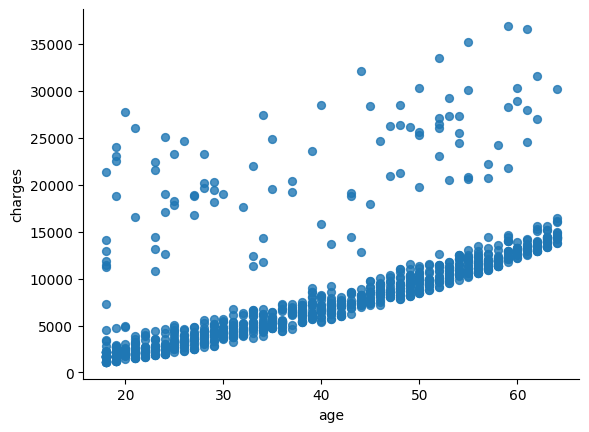

In [169]:
from matplotlib import pyplot as plt
non_smoker_df.plot(kind='scatter', x='age', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 1 Less Squares Method

Ages with intercept
[[ 1. 18.]
 [ 1. 28.]
 [ 1. 33.]]

MNK coefs
[-2091.42055657   267.24891283]

 predictions mnk and charges
[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289] 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


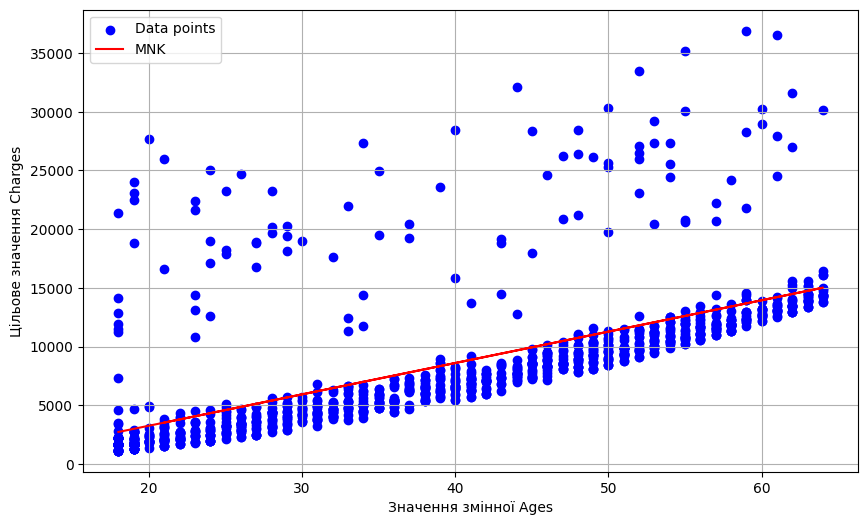

Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52
Mean: 8434.27 Std: 5990.96


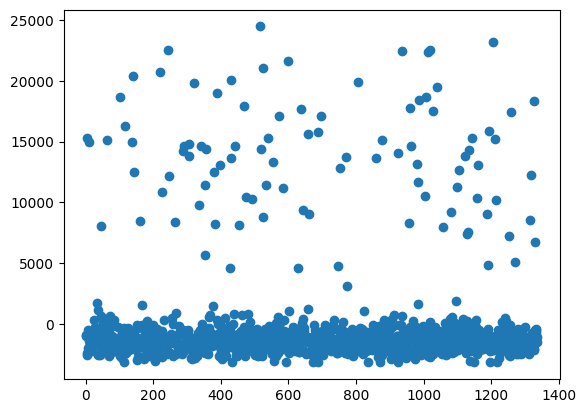

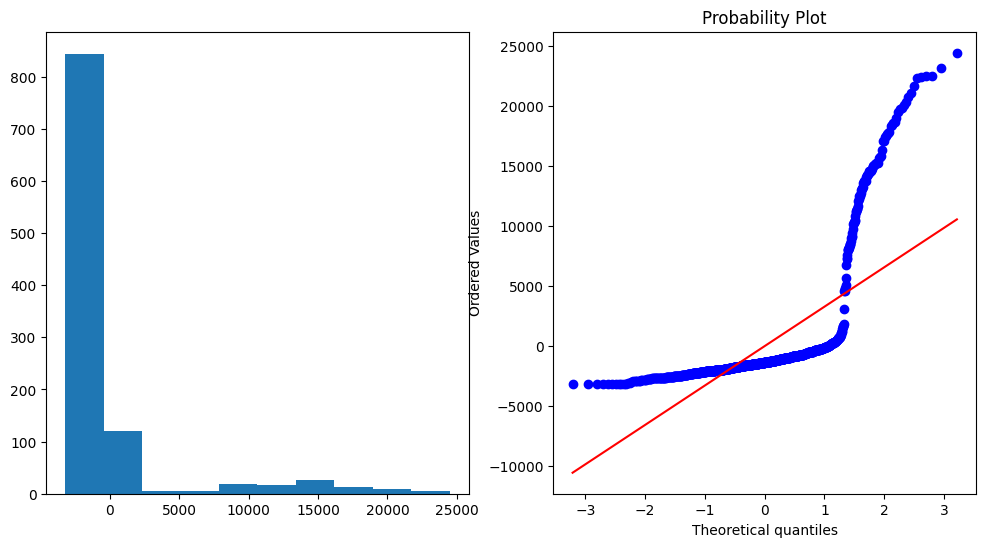

In [170]:
# 1
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# make matrix
age_with_intercept = np.c_[np.ones((non_smoker_df.age.shape[0], 1)), non_smoker_df.age]
print('Ages with intercept')
print(age_with_intercept[:3] )

MNK_coefs = normal_equations(age_with_intercept, non_smoker_df.charges)
print('\nMNK coefs')
print(MNK_coefs)


predictions_MNK = np.dot(age_with_intercept, MNK_coefs)
print('\n predictions mnk and charges')
print(predictions_MNK, non_smoker_df.charges)


plt.figure(figsize=(10, 6))
plt.scatter(non_smoker_df.age, non_smoker_df.charges, color='blue', label='Data points')
plt.plot(non_smoker_df.age, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної Ages')
plt.ylabel('Цільове значення Charges')
plt.legend()
plt.grid(True)
plt.show()

rmse = root_mean_squared_error(non_smoker_df.charges, predictions_MNK)
mae = mean_absolute_error(non_smoker_df.charges, predictions_MNK)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean: {np.mean(non_smoker_df.charges):.2f}", f"Std: {np.std(non_smoker_df.charges):.2f}")

errors = non_smoker_df.charges - predictions_MNK
plt.plot(errors, 'o');

from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors)
plt.subplot(1,2,2)
probplot(errors, dist='norm', plot=plt);


Залишки гомоскедастичні, але розподіл правоскошений (проте а сам розподіл вихідних даних age теж такий).
Коефіцієнти - [-2091.42055657   267.24891283]
RMSE - 4662.51
Std: 5990.96

RMSE менше за стандартне відхилення. Візуально модель виглядає непогано враховуючи, що є викиди.


# 2 Full-Batch градієнтного спуску з numpy

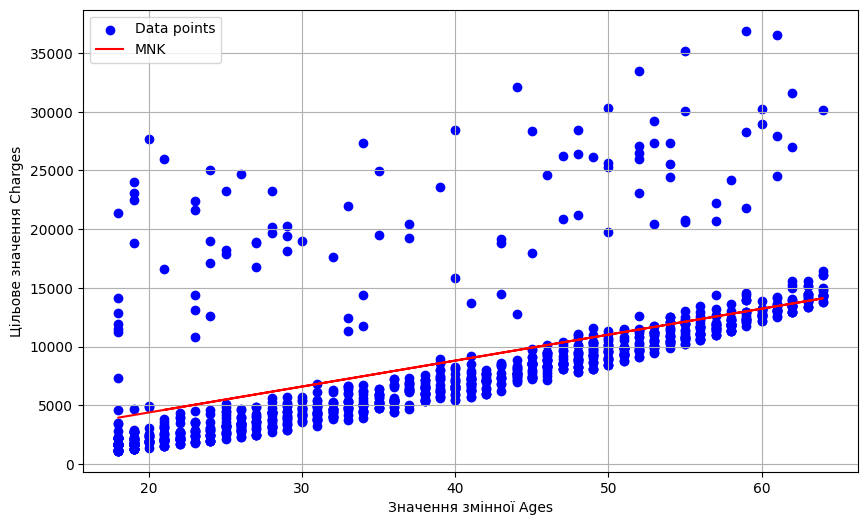

(220.99997822589862, -37.33532464174184, 4713.479668417624)

In [171]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

X = non_smoker_df.age.values.reshape(-1, 1)  # Робимо з age двовимірний масив (матрицю)

m_coef_grad, b_coef_grad, errors = full_batch_gradient_descent(X, non_smoker_df.charges, lr=0.00009, epochs=1000)
predictions_fbgd = m * X[:, 0] + b

rmse_grad = root_mean_squared_error(non_smoker_df.charges, predictions_fbgd)

plt.figure(figsize=(10, 6))
plt.scatter(non_smoker_df.age, non_smoker_df.charges, color='blue', label='Data points')
plt.plot(non_smoker_df.age, predictions_fbgd, color='red', label='MNK')
plt.xlabel('Значення змінної Ages')
plt.ylabel('Цільове значення Charges')
plt.legend()
plt.grid(True)
plt.show()
m_coef_grad, b_coef_grad, rmse_grad


Результат візуально відрізняється від попередньої моделі. З lr були проблеми, з меншим та ьільшим степом, ніж lr=0.00009 виникали помилки. З lr=0,1 значення коефіцієнтві були однакові



## З scikit-learn.LinearRegression

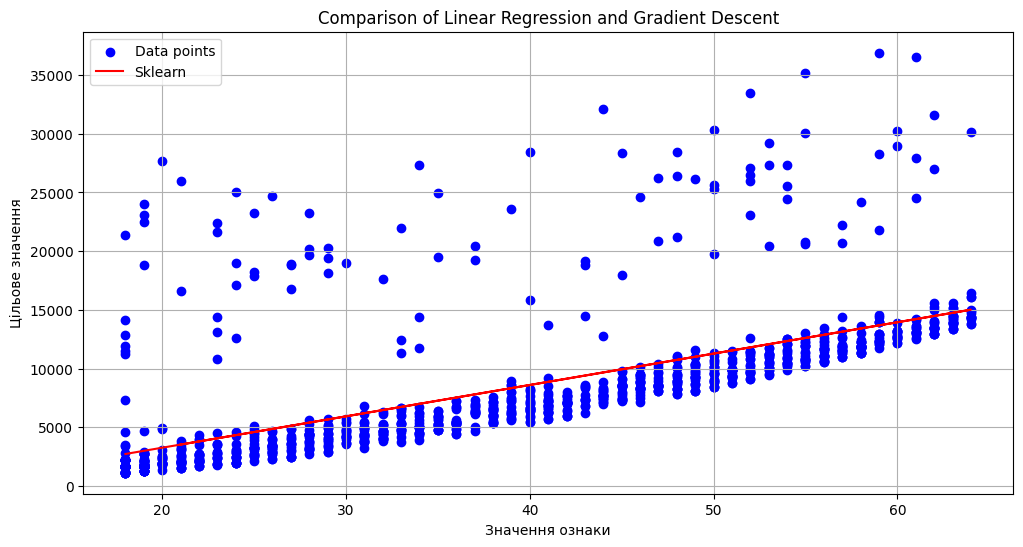

(-2091.4205565650864, array([267.24891283]), 4662.505766636395)

In [172]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

predictions_sklearn = lin_reg.predict(X)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='red', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
lin_reg.intercept_, lin_reg.coef_, rmse_sklearn

## Візуалізація та порівняння трьох методів

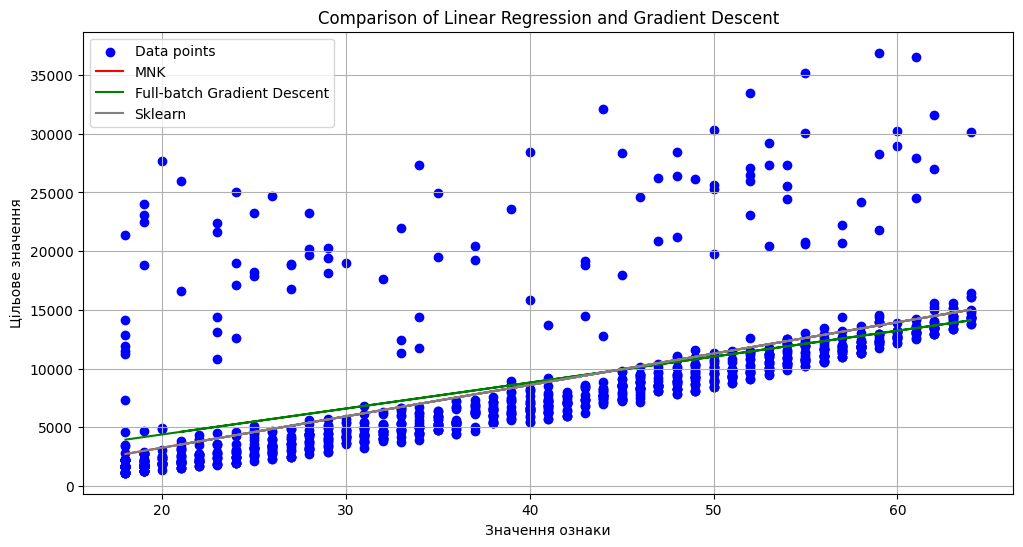


Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з  град. спуску:  -37.33532464174184 220.99997822589862
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4713.479668417624
RMSE sklearn:  4662.505766636395


In [173]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

print('\nКоефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з  град. спуску: ', b_coef_grad, m_coef_grad)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

print('\nRMSE МНК: ', rmse)
print('RMSE град. спуску: ', rmse_grad)
print('RMSE sklearn: ', rmse_sklearn)

1. Результати MHK and sklearn однакові. Результату градієнтного спуску віжрізняється.
2. Результати RMSE кращі для MHK and sklearn.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

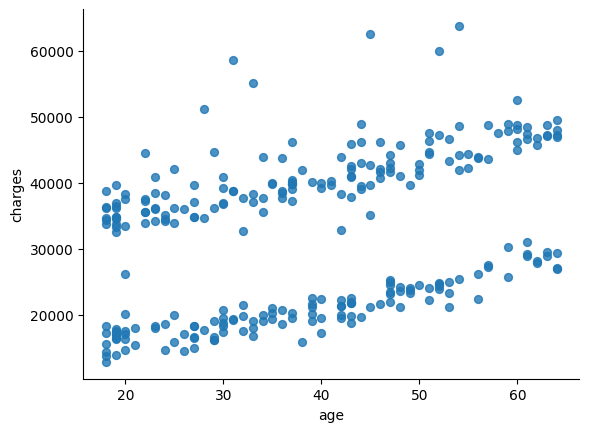

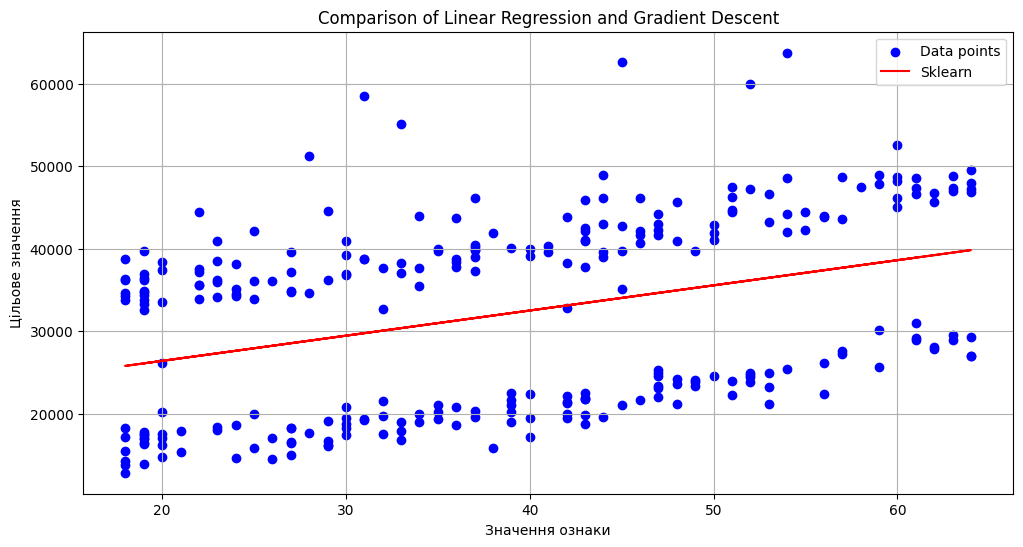


lin_reg_smoker.intercept_, lin_reg_smoker.coef_  20294.128126915966 [305.23760211]
RMSE:  10711.00334810241
r2:  0.13558924096084068
std:  32050.23183153284


In [181]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.plot(kind='scatter', x='age', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

X_smoker = smoker_df.age.values.reshape(-1, 1)  # Робимо з age двовимірний масив (матрицю)

lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(X_smoker, smoker_df.charges)

predictions_sklearn_smoker = lin_reg_smoker.predict(X_smoker)

plt.figure(figsize=(12, 6))
plt.scatter(X_smoker[:, 0], smoker_df.charges, color='blue', label='Data points')
plt.plot(X_smoker[:, 0], predictions_sklearn_smoker, color='red', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

rmse_sklearn_smoker = root_mean_squared_error(smoker_df.charges, predictions_sklearn_smoker)
r2 = r2_score(smoker_df.charges, predictions_sklearn_smoker)

print('\nlin_reg_smoker.intercept_, lin_reg_smoker.coef_ ', lin_reg_smoker.intercept_, lin_reg_smoker.coef_)
print('RMSE: ', rmse_sklearn_smoker)
print('r2: ', r2)
print('std: ', np.mean(smoker_df.charges))




1. Дивлячись на те, що RMSE у три рази меньше за стандартне відхилення, то можна припустити, що модель непогана, проте r2 близький до 0.
2. Загалом дивлячись на те, що у нас є у даних два ʼшариʼ точок, а лінія моделі проходить повередині, то це очікувано, бо так будуь найоптимальніші результати, але похибки доволі високі.
3. В принципі модель спрацювала очікувано і не погано з точки зору даних, які у нас є, але тут певно треба попрацювати з даними, та зрозуміти чому є два чіткі ʼшариʼ даних з проміжком між ними.